## Naive Bayes classifier for Sentiment Analysis

In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt

# Packages for text pre-processing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Package for splitting the input data
from sklearn.model_selection import train_test_split

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Packages for building an ML model
from sklearn.naive_bayes import GaussianNB

In [43]:
!/Users/isavchuk/projects/text_mining/venv/bin/python3 -m pip install -q matplotlib

### Loading data

In [2]:
# Dataset - IMDB movie reviews dataset from Kaggle
# where each review tagged as positive or negative
imdb_df = pd.read_csv('./datasets/IMDB Dataset.csv', encoding='ISO-8859-1')
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb_df.shape

(50000, 2)

In [5]:
imdb_df = imdb_df.sample(10000, replace=False) # sampling data for quicker analysis
imdb_df.describe()

,review,sentiment
count,10000,10000
unique,9982,2
top,"Okay, you have:<br /><br />Penelope Keith as M...",positive
freq,2,5056


In [6]:
X = imdb_df['review']
y = imdb_df['sentiment']

In [7]:
X.head()

47420    The worst part of all is the poor scripting, l...
29889    "I remember waiting to be born..." <br /><br /...
9913     to start off, i'm easily pleased. i'm in no wa...
8893     Wow, what can I say about this film? It's a lo...
11648    I feel very generous giving this movie a 2 out...
Name: review, dtype: object

In [8]:
y.head()

47420    negative
29889    negative
9913     negative
8893     negative
11648    negative
Name: sentiment, dtype: object

### Building Numeric Features out of Text data

In [9]:
count_vectorizer = CountVectorizer()
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(10000, 52848)

In [13]:
print(transformed_vector[0]) # transformed_vector is a frequency term matrix, 
                             # shows how often a particular word occurs in a document

  (0, 46957)	5
  (0, 52092)	1
  (0, 34206)	1
  (0, 32901)	2
  (0, 1799)	1
  (0, 24510)	3
  (0, 35860)	1
  (0, 41190)	1
  (0, 26864)	1
  (0, 47508)	2
  (0, 45574)	1
  (0, 1057)	1
  (0, 6096)	10
  (0, 14261)	2
  (0, 8137)	2
  (0, 24085)	1
  (0, 38805)	1
  (0, 2224)	4
  (0, 2415)	2
  (0, 21952)	1
  (0, 21226)	2
  (0, 16666)	1
  (0, 29113)	1
  (0, 22185)	1
  (0, 22740)	2
  :	:
  (0, 19898)	1
  (0, 28315)	1
  (0, 4917)	1
  (0, 24581)	1
  (0, 18749)	1
  (0, 51528)	1
  (0, 11916)	1
  (0, 19391)	1
  (0, 47095)	1
  (0, 42614)	1
  (0, 4562)	1
  (0, 43585)	1
  (0, 33639)	1
  (0, 32537)	1
  (0, 2649)	1
  (0, 37811)	1
  (0, 26505)	1
  (0, 4155)	1
  (0, 51045)	1
  (0, 33104)	1
  (0, 22980)	1
  (0, 52489)	1
  (0, 27346)	1
  (0, 33010)	1
  (0, 1334)	1


In [17]:
tfidf_transformer = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)

print(tfidf_vector[0]) # take a look at a single document representation

  (0, 52489)	0.034985180880408535
  (0, 52092)	0.07505252353933713
  (0, 51966)	0.12055159462692928
  (0, 51528)	0.07063830053960321
  (0, 51045)	0.11978677945726582
  (0, 51004)	0.03179027999690055
  (0, 49858)	0.09613935832897282
  (0, 47508)	0.04668361605819788
  (0, 47095)	0.06319179509553234
  (0, 46957)	0.11086940945467468
  (0, 45574)	0.14231175582231656
  (0, 43585)	0.09303588658704427
  (0, 42614)	0.07301291497907725
  (0, 41647)	0.09556989923898396
  (0, 41457)	0.09173902604549226
  (0, 41190)	0.1609406322181846
  (0, 38805)	0.1367863017407923
  (0, 37811)	0.07639464379047084
  (0, 35860)	0.08384468202390807
  (0, 34206)	0.06760219355477239
  (0, 33639)	0.13638287355785758
  (0, 33604)	0.14761399764051503
  (0, 33104)	0.0463703804691528
  (0, 33010)	0.06564396767353019
  (0, 32901)	0.04621844258664789
  :	:
  (0, 22185)	0.1463203175154438
  (0, 21952)	0.07962339782319584
  (0, 21773)	0.1006799229521215
  (0, 21226)	0.08387439110573525
  (0, 19898)	0.1621973296279027
  (0, 193

### Classification 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_vector, y, test_size=0.2)
x_train.shape, x_test.shape

((8000, 52848), (2000, 52848))

In [21]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [47]:
# helper function
def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print('Length of the testing data: ', len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    #print('Confusion matrix:\n', cm)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [23]:
clf = GaussianNB().fit(x_train.toarray(), y_train)

Length of the testing data:  2000
Accuracy count:  1271
Accuracy score:  0.6355
Precision score:  0.6361635406166498
Recall score:  0.6355


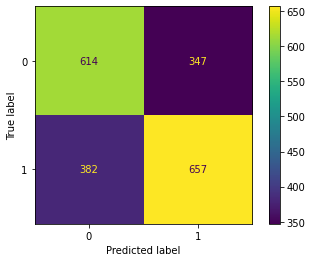

In [48]:
y_pred = clf.predict(x_test.toarray())
summarize_classification(y_test, y_pred)